In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


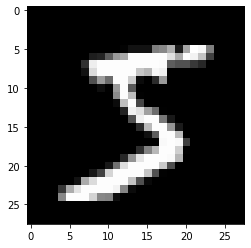

In [7]:
# initial
train_images_file = open('./data/train-images-idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('data/train-labels-idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    train_set.append((image, label))

# Reading The Test Set
test_images_file = open('data/t10k-images-idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('data/t10k-labels-idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    test_set.append((image, label))

# Plotting an image
show_image(train_set[0][0])
plt.show()

input image number 2 


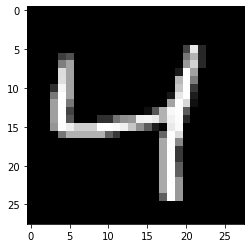

lable number 2
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [9]:
# check some images
print('input image number 2 ')
show_image(train_set[2][0])
plt.show()
print('lable number 2')
print(train_set[2][1])

In [86]:
print('INITIAL weights\n\n')
np.random.seed(3)
Wl1 = np.random.random((16, 784))
Wl2 = np.random.random((16, 16))
Wl3 = np.random.random((10, 16))

B1 = np.random.random((16, 1))
B2 = np.random.random((16, 1))
B3 = np.random.random((10, 1))

print(B3)
# def forward()

INITIAL weights


[[0.29752474]
 [0.14874001]
 [0.38863756]
 [0.66046635]
 [0.01770304]
 [0.3201437 ]
 [0.39947698]
 [0.35201998]
 [0.15542162]
 [0.7167966 ]]


In [84]:
arr = np.array([[1, 2, 3]])


def sigmoid(arr):
    return 1 / (np.exp(-arr) + 1)


def sigmoid_prime(arr):
    return sigmoid(arr) * (1 - sigmoid(arr))


print(sigmoid(arr))

[[0.73105858 0.88079708 0.95257413]]


In [49]:
print('test')
arr = np.array([[1, 2, 3],
                [1, 1, 1]])

arr2 = np.array([[1, 2, 3]])
print(arr.T.shape)
print(arr2.shape)
print(arr2.dot(arr.T))


test
(3, 2)
(1, 3)
[[14  6]]


FORWARD 
W1 (16, 784)
W2 (16, 16)
W3 (10, 16)


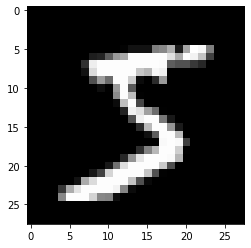

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[ 9.76433294]
 [ 6.51100185]
 [ 9.43643696]
 [ 8.37540748]
 [ 9.26146757]
 [ 8.9913008 ]
 [10.62802513]
 [ 9.01209237]
 [ 7.34305912]
 [ 9.23196974]]


In [91]:
print('FORWARD ')
print('W1', Wl1.shape)
print('W2', Wl2.shape)
print('W3', Wl3.shape)


def forward(input_layer, Wl1, Wl2, Wl3, B1, B2, B3):
    Z1 = Wl1 @ input_layer + B1
    A1 = sigmoid(Z1)
    Z2 = Wl2 @ A1 + B2
    A2 = sigmoid(Z2)
    Z3 = Wl3 @ A2 + B3
    A3 = sigmoid(Z3)
    return A1, A2, A3, Z1, Z2, Z3


show_image(train_set[0][0])
plt.show()
A1, A2, A3, Z1, Z2, Z3 = forward(train_set[0][0], Wl1, Wl2, Wl3, B1, B2, B3)
print(A1)
print(Z3)
# print('input ', train_set[3][0])
# print('predict',x)

In [9]:
correct_count = 0
for i in range(1000):
    A1, A2, A3, Z1, Z2, Z3 = forward(train_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(train_set[i][1])
    print('prediction= ', predict)
    print('label= ', label)
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / 1000 * 100, '%')


prediction=  7
label=  5
prediction=  7
label=  0
prediction=  7
label=  4
prediction=  7
label=  1
prediction=  7
label=  9
prediction=  7
label=  2
prediction=  7
label=  1
prediction=  7
label=  3
prediction=  7
label=  1
prediction=  7
label=  4
prediction=  7
label=  3
prediction=  7
label=  5
prediction=  7
label=  3
prediction=  7
label=  6
prediction=  7
label=  1
prediction=  7
label=  7
prediction=  7
label=  2
prediction=  7
label=  8
prediction=  7
label=  6
prediction=  7
label=  9
prediction=  7
label=  4
prediction=  7
label=  0
prediction=  7
label=  9
prediction=  7
label=  1
prediction=  7
label=  1
prediction=  7
label=  2
prediction=  7
label=  4
prediction=  7
label=  3
prediction=  7
label=  2
prediction=  7
label=  7
prediction=  7
label=  3
prediction=  7
label=  8
prediction=  7
label=  6
prediction=  7
label=  9
prediction=  7
label=  0
prediction=  7
label=  5
prediction=  7
label=  6
prediction=  7
label=  0
prediction=  7
label=  7
prediction=  7
label=  6


In [34]:
def backpropagation(A1, A2, A3, Z1, Z2, Z3, W2, W3, input_layer, label):
    grad_A3 = 2 * (A3 - label)

    grad_b3 = 2 * sigmoid_prime(Z3) * (A3 - label)
    grad_Wl3 = (2 * sigmoid_prime(Z3) * (A3 - label)) @ A2.T
    grad_A2 = W3.T @ (2 * sigmoid_prime(Z3) * (A3 - label))

    grad_b2 = grad_A2* sigmoid_prime(Z2)
    grad_Wl2 = (grad_A2 * sigmoid_prime(Z2)) @ A1.T
    grad_A1 = W2.T @ (sigmoid_prime(Z2) * grad_A2)

    grad_b1 = grad_A1* sigmoid_prime(Z1)
    grad_Wl1 = (grad_A1 * sigmoid_prime(Z1)) @ input_layer.T

    return grad_Wl1, grad_Wl2, grad_Wl3, grad_b1, grad_b2, grad_b3





In [35]:
A1, A2, A3, Z1, Z2, Z3 = forward(train_set[3][0], Wl1, Wl2, Wl3, B1, B2, B3)
grad_Wl1, grad_Wl2, grad_Wl3, grad_b1, grad_b2, grad_b3 = backpropagation(A1, A2, A3, Z1, Z2, Z3,
                                                                          Wl2, Wl3, train_set[3][0], train_set[3][1])

print(grad_b1[2])

[1.07171593e-18]


In [36]:
x = np.array([1, 2, 3])

In [43]:
def model(input_data, batch, epoc, learning_rate):
    m = len(input_data)
    np.random.seed(100)
    Wl1 = np.random.random((16, 784))
    Wl2 = np.random.random((16, 16))
    Wl3 = np.random.random((10, 16))

    B1 = np.zeros((16, 1))
    B2 = np.zeros((16, 1))
    B3 = np.zeros((10, 1))

    cost_list = []
    for i in range(epoc):
        sum_cost = 0
        for j in range(m):
            if j % batch == 0:
                batch_list = input_data[j - batch:j]
                grad_Wl1 = grad_Wl2 = grad_Wl3 = 0
                grad_b1 = grad_b2 = grad_b3 = 0

                for item in batch_list:
                    y = item[1]
                    A1, A2, A3, Z1, Z2, Z3 = forward(item[0], Wl1, Wl2, Wl3, B1, B2, B3)
                    cost = np.sum((A3 - y) @ (A3 - y).T)
                    sum_cost += cost

                    g_Wl1, g_Wl2, g_Wl3, g_b1, g_b2, g_b3 = backpropagation(A1, A2, A3, Z1, Z2, Z3,
                                                                            Wl2, Wl3, item[0], y)
                    grad_Wl1 += g_Wl1
                    grad_Wl2 += g_Wl2
                    grad_Wl3 += g_Wl3
                    grad_b1 += g_b1
                    grad_b2 += g_b2
                    grad_b3 += g_b3
                Wl1 = Wl1 - learning_rate * grad_Wl1/batch
                Wl2 = Wl2 - learning_rate * grad_Wl2/batch
                Wl3 = Wl3 - learning_rate * grad_Wl3/batch
                B1 = B1 - learning_rate * grad_b1/batch
                B2 = B2 - learning_rate * grad_b2/batch
                B3 = B3 - learning_rate * grad_b3/batch
        avg_cost = sum_cost / m
        print(avg_cost)
        cost_list.append(avg_cost)
    return Wl1, Wl2, Wl3, B1, B2, B3, cost_list


68.21774526041114
58.87893718606554
58.7536511904261
57.77801807552629
46.176721011322506
37.838793151685515
35.48918388309901
32.81874147686648
25.514092777046855
25.73374432269857
25.814968425988624
19.648873799988255
12.936289727737512
11.086882133745712
11.134556423784456
11.198362089292404
11.264801673475535
11.310502813741234
11.331075527480388
11.337958602102658
11.339735569228232
11.339802105642834
11.339196236649464
11.3381180298181
11.336372092302003
11.333183473594595
11.325232879851933
11.238550934227296
6.5073711712401225
6.117897160331396
6.133176433077258
6.138185645153317
6.139345699505978
6.139179994475176
6.1383804224406795
6.136893786507328
6.13391162490845
6.1249905317428075
5.331073507450953
2.654401640364778
2.6568171888768104
2.6567834030534114
2.6566839639038564
2.6565632256269702
2.6564149841985865
2.6562281780137176
2.6559847639297534
2.655653238938452
2.655173189599751
2.6544121759270896
2.653012229662299
2.649541477322401
2.620901472310909
0.8031734700638024

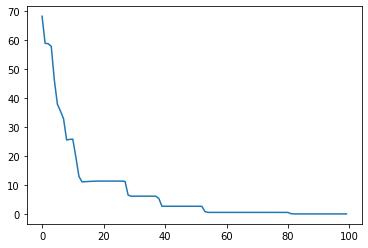

In [44]:
Wl1, Wl2, Wl3, B1, B2, B3, cost_list = model(train_set[:100], 10, 100, learning_rate=1)
cost_list = np.squeeze(cost_list)
plt.plot(cost_list)

In [46]:
# print(Wl1, Wl2, Wl3, B1, B2, B3)
correct_count = 0
for i in range(1000):
    A1, A2, A3, Z1, Z2, Z3 = forward(train_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    print(A3)
    predict = np.argmax(A3)
    label = np.argmax(train_set[i][1])
    print('prediction= ', predict)
    print('label= ', label)
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / 1000 * 100, '%')

[[0.16181392]
 [0.07842872]
 [0.05763397]
 [0.08843425]
 [0.08732456]
 [0.04772957]
 [0.09216933]
 [0.09552426]
 [0.06192556]
 [0.08662872]]
prediction=  0
label=  5
[[0.16181392]
 [0.07842872]
 [0.05763397]
 [0.08843425]
 [0.08732456]
 [0.04772957]
 [0.09216933]
 [0.09552426]
 [0.06192556]
 [0.08662872]]
prediction=  0
label=  0
[[0.16181392]
 [0.07842872]
 [0.05763397]
 [0.08843425]
 [0.08732456]
 [0.04772957]
 [0.09216933]
 [0.09552426]
 [0.06192556]
 [0.08662872]]
prediction=  0
label=  4
[[0.16181392]
 [0.07842872]
 [0.05763397]
 [0.08843425]
 [0.08732456]
 [0.04772957]
 [0.09216933]
 [0.09552426]
 [0.06192556]
 [0.08662872]]
prediction=  0
label=  1
[[0.16181392]
 [0.07842872]
 [0.05763397]
 [0.08843425]
 [0.08732456]
 [0.04772957]
 [0.09216933]
 [0.09552426]
 [0.06192556]
 [0.08662872]]
prediction=  0
label=  9
[[0.16181392]
 [0.07842872]
 [0.05763397]
 [0.08843425]
 [0.08732456]
 [0.04772957]
 [0.09216933]
 [0.09552426]
 [0.06192556]
 [0.08662872]]
prediction=  0
label=  2
[[0.